https://colab.research.google.com/drive/1GZyy6PCtvA5BMGYOrJBEfCFT4uFF2nA8

In [0]:
#import relevant packages
from keras.layers import Dense, Activation
from keras.layers.recurrent import SimpleRNN
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
import numpy as np
import nltk
from nltk.corpus import stopwords
import re
import pandas as pd

Using TensorFlow backend.


In [0]:
!wget https://www.dropbox.com/s/8yq0edd4q908xqw/airline_sentiment.csv?dl=1

--2019-10-02 08:28:00--  https://www.dropbox.com/s/8yq0edd4q908xqw/airline_sentiment.csv?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/8yq0edd4q908xqw/airline_sentiment.csv [following]
--2019-10-02 08:28:00--  https://www.dropbox.com/s/dl/8yq0edd4q908xqw/airline_sentiment.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc131c30d94f2961d8f7d5911da4.dl.dropboxusercontent.com/cd/0/get/AppDiLlKjiD8VQGEUkXYU1DCthvvMfzVaMzMUqXU8ZofvZ_wRKk9-2qjZrvkz4jU3g8WrdRRnj2AYegzc5FBPhyNdkqVsAVdwFlRHxpIighr8A/file?dl=1# [following]
--2019-10-02 08:28:00--  https://uc131c30d94f2961d8f7d5911da4.dl.dropboxusercontent.com/cd/0/get/AppDiLlKjiD8VQGEUkXYU1DCthvvMfzVaMzMUqXU8ZofvZ_wRKk9-2qjZrvkz4jU3g8WrdRRnj2AYegzc5FBPhyNdkqVsAVdwFlRHxpIig

In [0]:
!ls

'airline_sentiment.csv?dl=1'   sample_data


In [0]:
t=pd.read_csv('/content/airline_sentiment.csv?dl=1')
t.head()

,airline_sentiment,text
0,1,@VirginAmerica plus you've added commercials t...
1,0,@VirginAmerica it's really aggressive to blast...
2,0,@VirginAmerica and it's a really big bad thing...
3,0,@VirginAmerica seriously would pay $30 a fligh...
4,1,"@VirginAmerica yes, nearly every time I fly VX..."


In [0]:
import nltk
nltk.download('stopwords')
stop = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
def preprocess(text):
    text=text.lower()
    text=re.sub('[^0-9a-zA-Z]+',' ',text)
    words = text.split()
    words2=[w for w in words if (w not in stop)]
    #words3=[ps.stem(w) for w in words]
    words4=' '.join(words2)
    return(words4)

In [0]:
t['text'] = t['text'].apply(preprocess)

In [0]:
from collections import Counter
counts = Counter()
for i,review in enumerate(t['text']):
    counts.update(review.split())

In [0]:
words = sorted(counts, key=counts.get, reverse=True)
words[0:10]

['united',
 'flight',
 'usairways',
 'americanair',
 'southwestair',
 'jetblue',
 'get',
 'cancelled',
 'thanks',
 'service']

In [0]:
chars = words
nb_chars = len(words)
nb_chars

12532

In [0]:
word_to_int = {word: i for i, word in enumerate(words, 1)}
int_to_word = {i: word for i, word in enumerate(words, 1)}

In [0]:
int_to_word

In [0]:
mapped_reviews = []
for review in t['text']:
    mapped_reviews.append([word_to_int[word] for word in review.split()])

In [0]:
print('Original text:',t.loc[0]['text'])
print('Mapped text:',mapped_reviews[0])

Original text: virginamerica plus added commercials experience tacky
Mapped text: [44, 450, 1142, 2233, 100, 5429]


In [0]:
t.loc[0:1]['text']

0    virginamerica plus added commercials experienc...
1    virginamerica really aggressive blast obnoxiou...
Name: text, dtype: object

In [0]:
mapped_reviews[0:2]

[[44, 450, 1142, 2233, 100, 5429],
 [44, 57, 3036, 3845, 3846, 815, 3037, 3847, 19, 366, 2234]]

In [0]:
length_sent = []
for i in range(len(mapped_reviews)):
  length_sent.append(len(mapped_reviews[i]))
max(length_sent)

26

In [0]:
sequence_length = max(length_sent)
from keras.preprocessing.sequence import pad_sequences
X = pad_sequences(maxlen=sequence_length, sequences=mapped_reviews, padding="post", value=0)

In [0]:
X.shape

(11541, 26)

In [0]:
y=t['airline_sentiment'].values

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=10)
y_train2 = to_categorical(y_train)
y_test2 = to_categorical(y_test)

In [0]:
embedding_vecor_length=32
max_review_length=26
model = Sequential()
model.add(Embedding(input_dim=12533, output_dim=32, input_length = 26))
model.add(SimpleRNN(40, return_sequences=False))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 26, 32)            401056    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 40)                2920      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 82        
Total params: 404,058
Trainable params: 404,058
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
12533*32

401056

In [0]:
(32+40)*40+40

2920

In [0]:
history = model.fit(X_train, y_train2, validation_data=(X_test, y_test2), epochs=10, batch_size=32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 8078 samples, validate on 3463 samples
Epoch 1/10
8078/8078 [==============================] - 4s 441us/step - loss: 0.3369 - acc: 0.8644 - val_loss: 0.2496 - val_acc: 0.9012
Epoch 2/10
8078/8078 [==============================] - 3s 318us/step - loss: 0.1463 - acc: 0.9497 - val_loss: 0.2665 - val_acc: 0.8969
Epoch 3/10
8078/8078 [==============================] - 3s 326us/step - loss: 0.0709 - acc: 0.9761 - val_loss: 0.2947 - val_acc: 0.8937
Epoch 4/10
8078/8078 [==============================] - 3s 340us/step - loss: 0.0355 - acc: 0.9890 - val_loss: 0.3805 - val_acc: 0.8851
Epoch 5/10
8078/8078 [==============================] - 3s 340us/step - loss: 0.0190 - acc: 0.9936 - val_loss: 0.4219 - val_acc: 0.8943
Epoch 6/10
8078/8078 [==============================] - 3s 325us/step - loss: 0.0137 - acc: 0.9957 - val_loss: 0.4305 - val_acc: 0.8770
Epoch 7/10
8078/8078 [===================

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


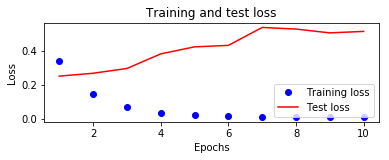

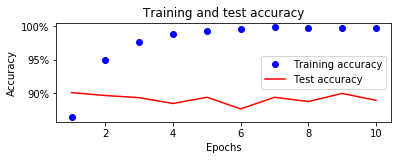

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(val_loss_values) + 1)
import matplotlib.ticker as mtick
plt.subplot(211)
plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, history.history['acc'], 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

# Sentiment classification using LSTM

In [0]:
from keras.layers import LSTM

In [0]:
embedding_vecor_length=32
max_review_length=26
model = Sequential()
model.add(Embedding(input_dim=12533, output_dim=32, input_length = 26))
model.add(LSTM(40, return_sequences=False))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 26, 32)            401056    
_________________________________________________________________
lstm_1 (LSTM)                (None, 40)                11680     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 82        
Total params: 412,818
Trainable params: 412,818
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
W = model.layers[1].get_weights()[0]
U = model.layers[1].get_weights()[1]
b = model.layers[1].get_weights()[2]
print(W.shape,U.shape,b.shape)

(32, 160) (40, 160) (160,)


In [0]:
units = 40
W_i = W[:, :units]
W_f = W[:, units: units * 2]
W_c = W[:, units * 2: units * 3]
W_o = W[:, units * 3:]

U_i = U[:, :units]
U_f = U[:, units: units * 2]
U_c = U[:, units * 2: units * 3]
U_o = U[:, units * 3:]

b_i = b[:units]
b_f = b[units: units * 2]
b_c = b[units * 2: units * 3]
b_o = b[units * 3:]

In [0]:
W.shape

(32, 160)

In [0]:
73*160

11680

In [0]:
history = model.fit(X_train, y_train2, validation_data=(X_test, y_test2), epochs=10, batch_size=32)

Train on 8078 samples, validate on 3463 samples
Epoch 1/10
8078/8078 [==============================] - 7s 816us/step - loss: 0.3653 - acc: 0.8522 - val_loss: 0.2282 - val_acc: 0.9111
Epoch 2/10
8078/8078 [==============================] - 6s 735us/step - loss: 0.1495 - acc: 0.9479 - val_loss: 0.2075 - val_acc: 0.9165
Epoch 3/10
8078/8078 [==============================] - 6s 735us/step - loss: 0.0808 - acc: 0.9743 - val_loss: 0.2470 - val_acc: 0.9165
Epoch 4/10
8078/8078 [==============================] - 6s 735us/step - loss: 0.0501 - acc: 0.9840 - val_loss: 0.3232 - val_acc: 0.9160
Epoch 5/10
8078/8078 [==============================] - 6s 726us/step - loss: 0.0330 - acc: 0.9892 - val_loss: 0.4026 - val_acc: 0.9125
Epoch 6/10
8078/8078 [==============================] - 6s 732us/step - loss: 0.0215 - acc: 0.9948 - val_loss: 0.3884 - val_acc: 0.9093
Epoch 7/10
8078/8078 [==============================] - 6s 731us/step - loss: 0.0235 - acc: 0.9941 - val_loss: 0.3654 - val_acc: 0.9082


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


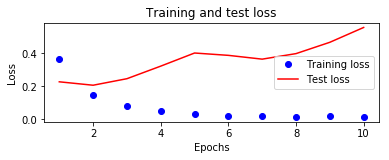

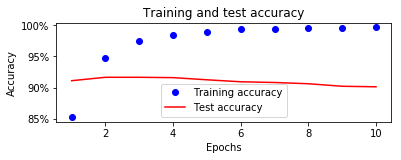

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(val_loss_values) + 1)
import matplotlib.ticker as mtick
plt.subplot(211)
plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, history.history['acc'], 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

# Sentiment classification using stacked LSTM

In [0]:
embedding_vecor_length=32
max_review_length=26
model = Sequential()
model.add(Embedding(input_dim=12533, output_dim=32, input_length = 26))
model.add(LSTM(40, return_sequences=True,name='lstm1'))
model.add(LSTM(40, return_sequences=False,name='lstm2'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 26, 32)            401056    
_________________________________________________________________
lstm1 (LSTM)                 (None, 26, 40)            11680     
_________________________________________________________________
lstm2 (LSTM)                 (None, 40)                12960     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 82        
Total params: 425,778
Trainable params: 425,778
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
X_train[0].shape

(26,)

In [0]:
from keras.models import Model

XX = model.input 
YY = model.layers[1].output
new_model = Model(XX, YY)
Xresult = new_model.predict(X_train[0].reshape(1,26))
Xresult.shape

(1, 26, 40)

In [0]:
model.get_layer("lstm1").output

<tf.Tensor 'lstm1/transpose_1:0' shape=(?, ?, 40) dtype=float32>

In [0]:
W = model.layers[2].get_weights()[0]
U = model.layers[2].get_weights()[1]
b = model.layers[2].get_weights()[2]
print(W.shape,U.shape,b.shape)

(40, 160) (40, 160) (160,)


In [0]:
history = model.fit(X_train, y_train2, validation_data=(X_test, y_test2), epochs=10, batch_size=32)

Train on 8078 samples, validate on 3463 samples
Epoch 1/10
8078/8078 [==============================] - 12s 1ms/step - loss: 0.3820 - acc: 0.8537 - val_loss: 0.2353 - val_acc: 0.9033
Epoch 2/10
8078/8078 [==============================] - 10s 1ms/step - loss: 0.1565 - acc: 0.9468 - val_loss: 0.2012 - val_acc: 0.9171
Epoch 3/10
8078/8078 [==============================] - 10s 1ms/step - loss: 0.0835 - acc: 0.9735 - val_loss: 0.2361 - val_acc: 0.9145
Epoch 4/10
8078/8078 [==============================] - 10s 1ms/step - loss: 0.0507 - acc: 0.9842 - val_loss: 0.2905 - val_acc: 0.9093
Epoch 5/10
8078/8078 [==============================] - 10s 1ms/step - loss: 0.0340 - acc: 0.9891 - val_loss: 0.3082 - val_acc: 0.9056
Epoch 6/10
8078/8078 [==============================] - 10s 1ms/step - loss: 0.0240 - acc: 0.9937 - val_loss: 0.4477 - val_acc: 0.9033
Epoch 7/10
8078/8078 [==============================] - 10s 1ms/step - loss: 0.0210 - acc: 0.9941 - val_loss: 0.3969 - val_acc: 0.9012
Epoch 8

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


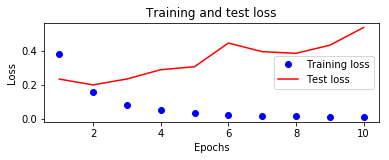

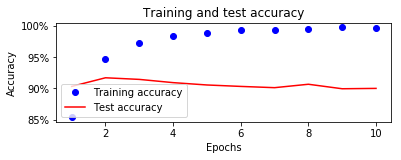

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(val_loss_values) + 1)
import matplotlib.ticker as mtick
plt.subplot(211)
plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, history.history['acc'], 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()